<a href="https://colab.research.google.com/github/skhetpal/Who-Cares-Dems-Republicans/blob/main/Homework_for_Lecture_4_fivethirtyeight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style

In [ ]:
# style.use('fivethirtyeight')
# Read data from the info backing 538 article https://fivethirtyeight.com/features/what-americas-governors-are-talking-about/
govner_words = pd.read_csv("https://github.com/fivethirtyeight/data/raw/master/state-of-the-state/words.csv", error_bad_lines=False)
# Grab a subset of statistically significant differences on specific topics for Rep/Dem governors (IOW, a pvalue of <= .1 [the lower the more differing])
govner_words_differ_subset = govner_words[govner_words.pval <= 0.1]
# Following subset topics chosen based on being the top phrase share for both parties
govner_enviro_subset = govner_words_differ_subset[(govner_words_differ_subset.phrase == "climate change") |
                                                  (govner_words_differ_subset.phrase == "clean energy") |
                                                  (govner_words_differ_subset.phrase == "environment") |
                                                  (govner_words_differ_subset.phrase == "energy future")]
govner_economy_subset = govner_words_differ_subset[(govner_words_differ_subset.phrase == "middle class") |
                                                  (govner_words_differ_subset.phrase == "income tax") |
                                                  (govner_words_differ_subset.phrase == "competitive") |
                                                  (govner_words_differ_subset.phrase == "small businesses")]
# Jobs & Education are lumped together (belief: education will spur good jobs to MAGA -v )
govner_jobs_subset = govner_words_differ_subset[(govner_words_differ_subset.phrase == "scholarships") |
                                                  (govner_words_differ_subset.phrase == "early childhood") |
                                                  (govner_words_differ_subset.phrase == "child care") |
                                                  (govner_words_differ_subset.phrase == "foster care")] # Unsure why both parties talking about foster care
# Health Care (TOTALLY blue across the board - yeow) - hard to choose the topics here
# Both are at least mouthing the word "health" and Both parties say "health care", but demos said it 100% to 75%
govner_health_subset = govner_words_differ_subset[(govner_words_differ_subset.phrase == "health outcomes") |  
                                                  (govner_words_differ_subset.phrase == "expand medicaid") |      
                                                  (govner_words_differ_subset.phrase == "existing conditions") |
                                                  (govner_words_differ_subset.phrase == "access health")]

In [ ]:
govner_economy_subset.head()

,phrase,category,d_speeches,r_speeches,total,percent_of_d_speeches,percent_of_r_speeches,chi2,pval
9,middle class,economy/fiscal issues,9,1,10,39.13,3.70,7.793881,0.005242
144,small businesses,economy/fiscal issues,11,5,16,47.83,18.52,3.333736,0.067873
157,income tax,economy/fiscal issues,5,14,19,21.74,51.85,2.963726,0.085152
188,competitive,economy/fiscal issues,7,17,24,30.43,62.96,2.737789,0.098000


In [ ]:
""" Used as leverage for the following large subsets
# A python dictionary
data = {"Car Price":[24050, 34850, 38150],

        "Kerb Weight":[3045, 3572, 3638]

        };
index     = ["Variant1", "Variant2", "Variant3"];
print("data:" + str(data))

# Dictionary loaded into a DataFrame       
dataFrame = pd.DataFrame(data=data, index=index);
print("dataFrame:" + str(dataFrame))

# Draw a vertical bar chart
dataFrame.plot.bar(rot=15, title="Car Price vs Car Weight comparision for Sedans made by a Car Company");
plt.show(block=True);
"""

'\n# A python dictionary\ndata = {"Car Price":[24050, 34850, 38150],\n\n        "Kerb Weight":[3045, 3572, 3638]\n\n        };\nindex     = ["Variant1", "Variant2", "Variant3"];\nprint("data:" + str(data))\n\n# Dictionary loaded into a DataFrame       \ndataFrame = pd.DataFrame(data=data, index=index);\nprint("dataFrame:" + str(dataFrame))\n\n# Draw a vertical bar chart\ndataFrame.plot.bar(rot=15, title="Car Price vs Car Weight comparision for Sedans made by a Car Company");\nplt.show(block=True);\n'

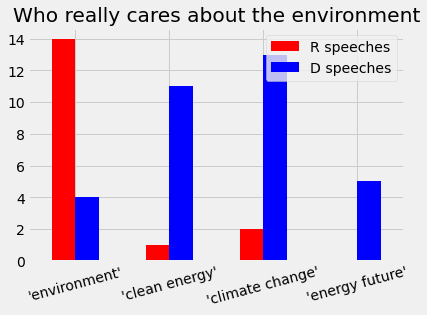

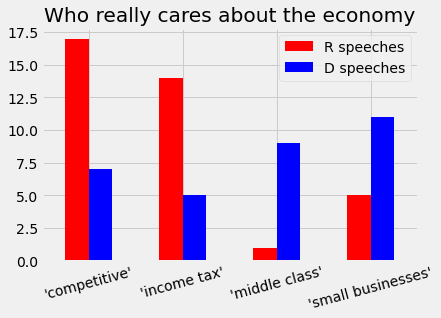

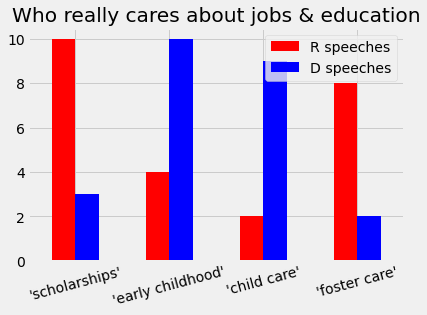

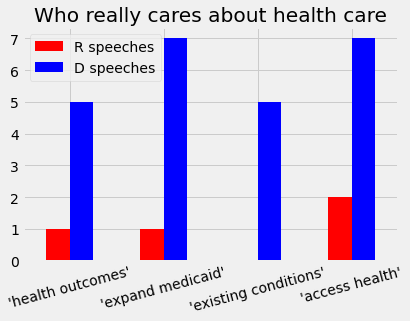

In [ ]:
# govner_enviro_subset.plot.bar(data=govner_enviro_subset, rot=15, title="Who really gives a darn about the environment")
# data = {"R speeches":[govner_enviro_subset.r_speeches],
#        "D speeches":[govner_enviro_subset.d_speeches]
# }
# data = {"clean energy":[govner_enviro_subset[govner_enviro_subset.phrase == "clean energy"].r_speeches, govner_enviro_subset[govner_enviro_subset.phrase == "clean energy"].d_speeches]}  <- BAD
# "D speeches":pd.Series.tolist(govner_enviro_subset[govner_enviro_subset.phrase == "clean energy"].d_speeches) <- works
# data collection DBG:
# print("R speeches:" + str(pd.Series.tolist(govner_enviro_subset[govner_enviro_subset.phrase == "clean energy"].r_speeches)[0]))
# print("D speeches:" + str(pd.Series.tolist(govner_enviro_subset[govner_enviro_subset.phrase == "clean energy"].d_speeches)[0]))
# data = {"R speeches":pd.Series([govner_enviro_subset[govner_enviro_subset.phrase == "clean energy"].r_speeches, govner_enviro_subset[govner_enviro_subset.phrase == "climate change"].r_speeches]).tolist,
#        "D speeches":pd.Series([govner_enviro_subset[govner_enviro_subset.phrase == "clean energy"].r_speeches, govner_enviro_subset[govner_enviro_subset.phrase == "climate change"].r_speeches]).tolist
# }

# print("Data:" + str(data))

index     = ["'environment'", "'clean energy'", "'climate change'", "'energy future'"]

# C'mon - there's gotta be a better way than the above (but not by much...)
data_dict = {'R speeches': pd.Series([pd.Series.tolist(govner_enviro_subset[govner_enviro_subset.phrase == "environment"].r_speeches)[0],
                                      pd.Series.tolist(govner_enviro_subset[govner_enviro_subset.phrase == "clean energy"].r_speeches)[0],
                                      pd.Series.tolist(govner_enviro_subset[govner_enviro_subset.phrase == "climate change"].r_speeches)[0],
                                      pd.Series.tolist(govner_enviro_subset[govner_enviro_subset.phrase == "energy future"].r_speeches)[0]], index=index),
             'D speeches': pd.Series([pd.Series.tolist(govner_enviro_subset[govner_enviro_subset.phrase == "environment"].d_speeches)[0],
                                      pd.Series.tolist(govner_enviro_subset[govner_enviro_subset.phrase == "clean energy"].d_speeches)[0],
                                      pd.Series.tolist(govner_enviro_subset[govner_enviro_subset.phrase == "climate change"].d_speeches)[0],
                                      pd.Series.tolist(govner_enviro_subset[govner_enviro_subset.phrase == "energy future"].d_speeches)[0]], index=index)}
#             'R speeches': pd.Series([1, 2], index=index),
#             'D speeches': pd.Series([4, 5], index=index)}

df = pd.DataFrame(data_dict)
df.plot.bar(rot=15, title="Who really cares about the environment", color=["red","blue"])

plt.show(block=True);


index     = ["'competitive'", "'income tax'", "'middle class'", "'small businesses'"]

# Economy
data_dict = {'R speeches': pd.Series([pd.Series.tolist(govner_economy_subset[govner_economy_subset.phrase == "competitive"].r_speeches)[0],
                                      pd.Series.tolist(govner_economy_subset[govner_economy_subset.phrase == "income tax"].r_speeches)[0],
                                      pd.Series.tolist(govner_economy_subset[govner_economy_subset.phrase == "middle class"].r_speeches)[0],
                                      pd.Series.tolist(govner_economy_subset[govner_economy_subset.phrase == "small businesses"].r_speeches)[0]], index=index),
             'D speeches': pd.Series([pd.Series.tolist(govner_economy_subset[govner_economy_subset.phrase == "competitive"].d_speeches)[0],
                                      pd.Series.tolist(govner_economy_subset[govner_economy_subset.phrase == "income tax"].d_speeches)[0],
                                      pd.Series.tolist(govner_economy_subset[govner_economy_subset.phrase == "middle class"].d_speeches)[0],
                                      pd.Series.tolist(govner_economy_subset[govner_economy_subset.phrase == "small businesses"].d_speeches)[0]], index=index)}

df = pd.DataFrame(data_dict)
df.plot.bar(rot=15, title="Who really cares about the economy", color=["red","blue"])
# plt.margins(x=10.0, y=10.0) <- naw (tried to get spacing around each plot)
plt.show(block=True);

# jobs & education
index     = ["'scholarships'", "'early childhood'", "'child care'", "'foster care'"]

data_dict = {'R speeches': pd.Series([pd.Series.tolist(govner_jobs_subset[govner_jobs_subset.phrase == "scholarships"].r_speeches)[0],
                                      pd.Series.tolist(govner_jobs_subset[govner_jobs_subset.phrase == "early childhood"].r_speeches)[0],
                                      pd.Series.tolist(govner_jobs_subset[govner_jobs_subset.phrase == "child care"].r_speeches)[0],
                                      pd.Series.tolist(govner_jobs_subset[govner_jobs_subset.phrase == "foster care"].r_speeches)[0]], index=index),
             'D speeches': pd.Series([pd.Series.tolist(govner_jobs_subset[govner_jobs_subset.phrase == "scholarships"].d_speeches)[0],
                                      pd.Series.tolist(govner_jobs_subset[govner_jobs_subset.phrase == "early childhood"].d_speeches)[0],
                                      pd.Series.tolist(govner_jobs_subset[govner_jobs_subset.phrase == "child care"].d_speeches)[0],
                                      pd.Series.tolist(govner_jobs_subset[govner_jobs_subset.phrase == "foster care"].d_speeches)[0]], index=index)}

df = pd.DataFrame(data_dict)
df.plot.bar(rot=15, title="Who really cares about jobs & education", color=["red","blue"])
plt.show(block=True);


# jobs & education
index     = ["'health outcomes'", "'expand medicaid'", "'existing conditions'", "'access health'"]

data_dict = {'R speeches': pd.Series([pd.Series.tolist(govner_health_subset[govner_health_subset.phrase == "health outcomes"].r_speeches)[0],
                                      pd.Series.tolist(govner_health_subset[govner_health_subset.phrase == "expand medicaid"].r_speeches)[0],
                                      pd.Series.tolist(govner_health_subset[govner_health_subset.phrase == "existing conditions"].r_speeches)[0],
                                      pd.Series.tolist(govner_health_subset[govner_health_subset.phrase == "access health"].r_speeches)[0]], index=index),
             'D speeches': pd.Series([pd.Series.tolist(govner_health_subset[govner_health_subset.phrase == "health outcomes"].d_speeches)[0],
                                      pd.Series.tolist(govner_health_subset[govner_health_subset.phrase == "expand medicaid"].d_speeches)[0],
                                      pd.Series.tolist(govner_health_subset[govner_health_subset.phrase == "existing conditions"].d_speeches)[0],
                                      pd.Series.tolist(govner_health_subset[govner_health_subset.phrase == "access health"].d_speeches)[0]], index=index)}

df = pd.DataFrame(data_dict)
df.plot.bar(rot=15, title="Who really cares about health care", color=["red","blue"])
plt.show(block=True);

In [ ]:


style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']